In [2]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
from pandas.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv("train.csv")
Test=pd.read_csv("test.csv")

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0    549
1    342
Name: Survived, dtype: int64

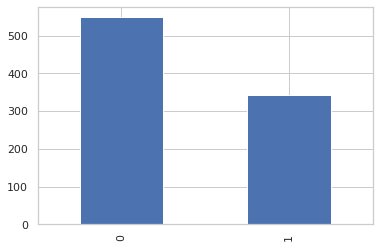

In [9]:
train["Survived"].value_counts().plot(kind="bar")
train["Survived"].value_counts()

<AxesSubplot:>

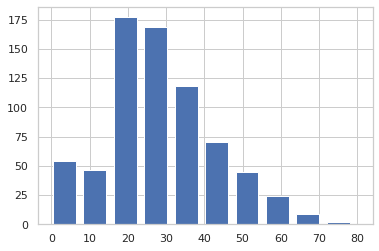

In [10]:
train["Age"].hist(width=6)

<AxesSubplot:>

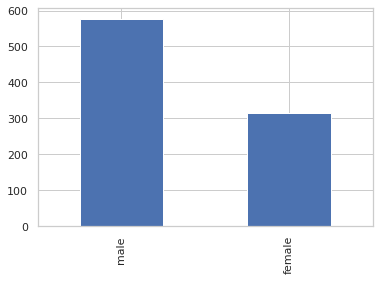

In [11]:
train["Sex"].value_counts().plot(kind="bar")

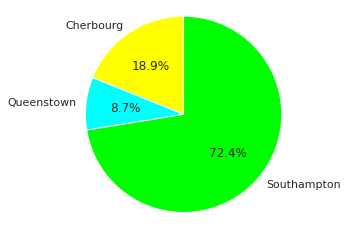

In [12]:
labels="Cherbourg","Queenstown","Southampton"
sizes=[sum(train["Embarked"]=="C"),sum(train["Embarked"]=="Q"),sum(train["Embarked"]=="S")]
colors=["yellow","aqua","lime"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
 
plt.axis('equal')
plt.show()

In [13]:
def survival_stacked_bar(variable):
    Died=train[train["Survived"]==0][variable].value_counts()/len(train["Survived"]==0)
    Survived=train[train["Survived"]==1][variable].value_counts()/len(train["Survived"]==1)
    data=pd.DataFrame([Died,Survived])
    data.index=["Did not survived","Survived"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()

,male,female
Did not survived,0.525253,0.090909
Survived,0.122334,0.261504


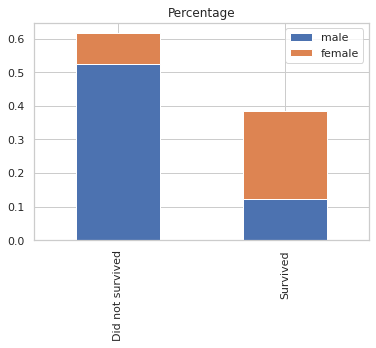

In [14]:
survival_stacked_bar("Sex")

,1,2,3
Did not survived,0.089787,0.108866,0.417508
Survived,0.152637,0.097643,0.133558


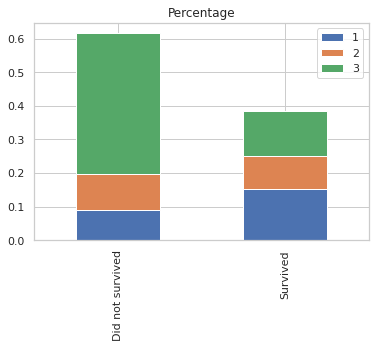

In [15]:
survival_stacked_bar("Pclass")

,S,C,Q
Did not survived,0.479237,0.084175,0.05275
Survived,0.243547,0.104377,0.03367


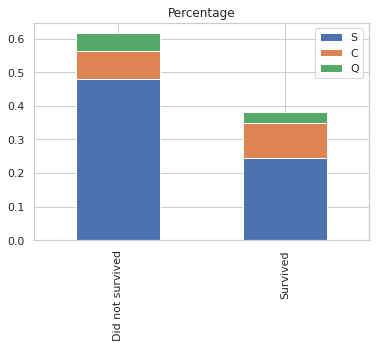

In [16]:
survival_stacked_bar("Embarked")

,0,1,2,3,4,5,8
Did not survived,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856
Survived,0.235690,0.125701,0.014590,0.004489,0.003367,NaN,NaN


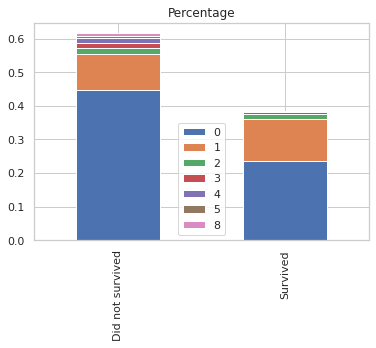

In [17]:
survival_stacked_bar("SibSp")

,0,1,2,3,4,5,6
Did not survived,0.499439,0.059484,0.044893,0.002245,0.004489,0.004489,0.001122
Survived,0.261504,0.072952,0.044893,0.003367,NaN,0.001122,NaN


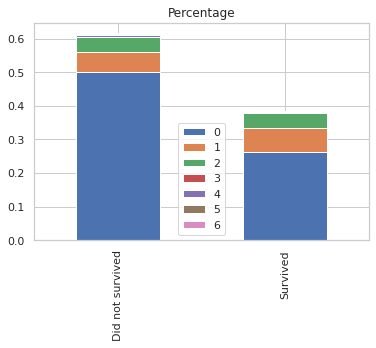

In [18]:
survival_stacked_bar("Parch")

<AxesSubplot:>

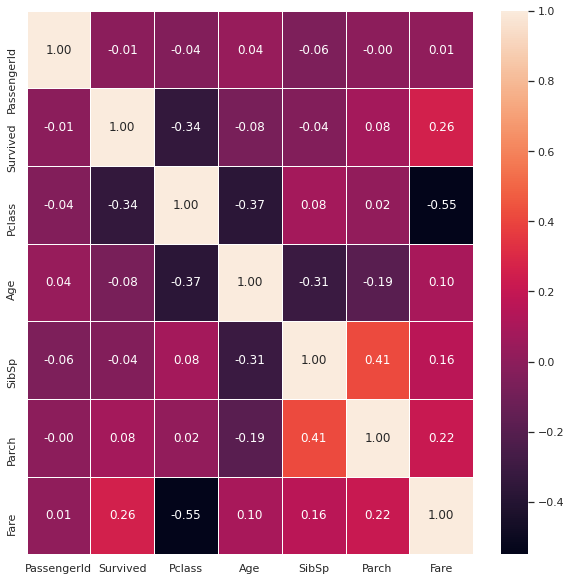

In [22]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

In [23]:
traintestdata=pd.concat([train,Test])
traintestdata.shape

(1309, 12)

,0,1
Did not survived,0.090909,0.525253
Survived,0.261504,0.122334


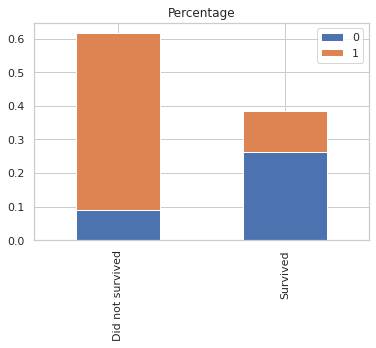

In [24]:
sex_map={"male":1,"female":0}
train["Sex"]=train["Sex"].map(sex_map)
Test["Sex"]=Test["Sex"].map(sex_map)
survival_stacked_bar("Sex")

In [25]:
train.insert(value=train.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")
Test.insert(value=Test.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")

In [27]:
title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"}
train["Title"]=train.Title.map(title_map)
Test["Title"]=Test.Title.map(title_map)

In [28]:
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values
Title: 0 missing values


In [29]:
for i in Test.columns:
    print (i + ": "+str(sum(Test[i].isnull()))+" missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values
Title: 0 missing values


In [30]:
train_set_1=train.groupby(["Pclass","SibSp"])
train_set_1_median=train_set_1.median()
train_set_1_median

PassengerId  Survived  Sex   Age  Parch      Fare
Pclass SibSp                                                   
1      0            476.0       1.0  1.0  37.0    0.0   39.6000
       1            485.0       1.0  0.0  38.0    0.0   79.2000
       2            572.0       1.0  0.0  44.0    0.0  133.6500
       3             89.0       1.0  0.0  23.0    2.0  263.0000
2      0            407.0       0.0  1.0  30.0    0.0   13.0000
       1            451.0       1.0  0.0  29.0    1.0   26.0000
       2            565.5       0.5  1.0  23.5    1.0   39.0000
       3            727.0       1.0  0.0  30.0    0.0   21.0000
3      0            472.0       0.0  1.0  26.0    0.0    7.8958
       1            372.0       0.0  1.0  25.0    0.0   15.5500
       2            334.0       0.0  1.0  19.5    0.0   19.2583
       3            302.5       0.0  0.0   6.0    1.0   25.4667
       4            264.5       0.0  1.0   6.5    1.5   31.2750
       5            387.0       0.0  1.0  11.0    2.0   46.9000
       8            325.0       0.0  1.0   NaN    2.0   69.5500

In [31]:
Test_set_1=Test.groupby(["Pclass","SibSp"])
Test_set_1_median=Test_set_1.median()
Test_set_1_median

PassengerId  Sex   Age  Parch       Fare
Pclass SibSp                                          
1      0           1088.0  1.0  39.0    0.0   42.50000
       1           1109.5  0.5  46.0    0.0   82.06250
       2            969.0  0.0  55.0    0.0   51.47920
       3            945.0  0.0  28.0    2.0  263.00000
2      0           1117.5  1.0  27.0    0.0   13.00000
       1           1139.0  1.0  29.0    0.0   26.00000
       2           1077.5  0.5  21.0    0.5   31.50000
3      0           1095.5  1.0  24.0    0.0    7.82920
       1           1084.0  0.0  20.0    1.0   15.24580
       2           1059.0  1.0  19.5    0.0   21.67920
       3           1281.0  1.0  29.0    1.0   21.07500
       4           1076.0  1.0  11.5    2.0   30.25625
       5           1032.0  0.0  10.0    2.0   46.90000
       8           1166.0  0.5  14.5    2.0   69.55000

In [32]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median() 

#I used the median age of Pclass=3 as a replacement as there is no median value for SibSp=8 in training dataset

In [33]:
train["Age"]=train["Age"].fillna(fill_age(train,train_set_1_median))
Test["Age"]=Test["Age"].fillna(fill_age(Test,Test_set_1_median))

In [34]:
traintestdata.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [35]:
train["Cabin"]=train["Cabin"].fillna("U")
Test["Cabin"]=Test["Cabin"].fillna("U")
train["Cabin"]=train["Cabin"].map(lambda x: x[0])
Test["Cabin"]=Test["Cabin"].map(lambda x: x[0])

In [36]:
def new_cabin_features(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)  

#Cabin U is when the rest of cabins are 0


In [37]:
new_cabin_features(train)
new_cabin_features(Test)

In [38]:
train["Embarked"]=train["Embarked"].fillna("S")

In [39]:
def new_embark_features(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0) 
#Embarked on Q is when the rest of embarked are 0

In [40]:
new_embark_features(train)
new_embark_features(Test)

In [41]:
Test["Fare"]=Test["Fare"].fillna(np.mean(Test["Fare"]))

In [43]:
title_map_2={'Mr':1, 
           'Mrs':1, 
           'Miss':1,
           'Master':2,
           'Officer':3,
           'Royalty':4}

train["Title"]=train["Title"].map(title_map_2)
Test["Title"]=Test["Title"].map(title_map_2)

In [44]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1
Test["FamilySize"]=Test["SibSp"]+Test["Parch"]+1

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        0 non-null      float64
 13  Cabin A      891 non-null    int64  
 14  Cabin B      891 non-null    int64  
 15  Cabin C      891 non-null    int64  
 16  Cabin D      891 non-null    int64  
 17  Cabin E      891 non-null    int64  
 18  Cabin F      891 non-null    int64  
 19  Cabin G 

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

ModuleNotFoundError: No module named 'statsmodels'

In [66]:
!pip install statsmodels

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.4 MB 17 kB/s eta 0:00:013
     |████████████████████████████████| 231 kB 10 kB/s eta 0:00:01


In [62]:
train.drop(["Name","Ticket","PassengerId","Embarked","Cabin"],inplace=True,axis=1)
Test.drop(["Name","Ticket","Embarked","Cabin"],inplace=True,axis=1)
train.tail()

KeyError: "['Name' 'Ticket' 'PassengerId' 'Embarked' 'Cabin'] not found in axis"

In [63]:
x=train.drop(["Survived"],axis=1)
y=train["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

NameError: name 'train_test_split' is not defined

In [64]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

NameError: name 'KFold' is not defined

In [58]:
def acc_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

In [59]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [60]:
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [ ]:
def aucscore(model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc

def plt_roc_curve(name,model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    
    auc= skplt.metrics.auc(x,y)
    
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()


In [67]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(log_reg)))
confusion_matrix_model(log_reg)

#skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True,figsize=(10,10))

NameError: name 'x_train' is not defined

In [ ]:
plt_roc_curve("Logistic Regression",log_reg,has_proba=True)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
ldaA = lda.transform(x_train)
print("Accuracy: " + str(acc_score(lda)))
confusion_matrix_model(lda)

In [ ]:
plt_roc_curve("LDA",lda,has_proba=True)

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(qda)))
confusion_matrix_model(qda)

In [ ]:
plt_roc_curve("QDA",qda,has_proba=True)

In [ ]:
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(SVC_rbf)))
confusion_matrix_model(SVC_rbf)

In [ ]:
plt_roc_curve("RBF SVM",SVC_rbf,has_proba=False)

In [ ]:
SVC_lin=SVC(kernel="linear")
SVC_lin.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(SVC_lin)))
confusion_matrix_model(SVC_lin)

In [ ]:
plt_roc_curve("Linear SVM",SVC_lin,has_proba=False)

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(KNN)))
confusion_matrix_model(KNN)

In [ ]:
plt_roc_curve("KNN (5)",KNN,has_proba=True)

In [ ]:
Dec_tree=DecisionTreeClassifier(max_depth=4,random_state=5)
Dec_tree.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(Dec_tree)))
confusion_matrix_model(Dec_tree)

#skplt.metrics.plot_confusion_matrix(y_test, Dec_tree.predict(x_test),normalize=True,figsize=(6,6),text_fontsize='small')

In [ ]:
plt_roc_curve("Decision Tree",Dec_tree,has_proba=True)

In [ ]:
importance_of_features(Dec_tree)

In [ ]:
ranfor = RandomForestClassifier(n_estimators=50, max_features='sqrt',max_depth=6,random_state=10)
ranfor = ranfor.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(ranfor)))
confusion_matrix_model(ranfor)

In [68]:
plt_roc_curve("Random Forest",ranfor,has_proba=True)

NameError: name 'plt_roc_curve' is not defined

In [69]:
importance_of_features(ranfor)

NameError: name 'ranfor' is not defined

In [70]:
# XGBoost
xgclass = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.01).fit(x_train, y_train)
print("Accuracy: " + str(acc_score(xgclass)))
confusion_matrix_model(xgclass)

NameError: name 'xgb' is not defined

In [71]:
plt_roc_curve("XGBoosting",xgclass,has_proba=True)

NameError: name 'plt_roc_curve' is not defined

In [72]:
importance_of_features(xgclass)

NameError: name 'xgclass' is not defined

In [ ]:
Classifiers=["Logistic Regression","Linear Discriminant Analysis","Quadratic Discriminant Analysis","Support Vector Machine (RBF)","Support Vector Machine (Linear)","K-Nearest Neighbours","Decision Tree","Random Forest","XGBoost"]
Acc=[acc_score(x) for x in [log_reg,lda,qda,SVC_rbf,SVC_lin,KNN,Dec_tree,ranfor,xgclass]]
auc_scores_prob=[aucscore(x,has_proba=True) for x in [log_reg,lda,qda,KNN,Dec_tree,ranfor,xgclass]]
auc_scores_noprob=[aucscore(x,has_proba=False) for x in [SVC_rbf,SVC_lin,]]
auc_scores=auc_scores_prob[:3] + auc_scores_noprob + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results